In [1]:
import requests

In [3]:
city = 'Hanoi'
url = 'https://api.waqi.info/feed/' + city + '/?token='
api_key = '4cc190163dcd4f2c221c0c635bfa4d4aeeb69fda'

main_url = url + api_key
r = requests.get(main_url)
data = r.json()['data']
data

{'aqi': 99,
 'idx': 8641,
 'attributions': [{'url': 'http://cem.gov.vn/',
   'name': 'Vietnam Center For Environmental Monitoring Portal (cổng thông tin quan trắc môi trường)',
   'logo': 'Vietnam-CEM.png'},
  {'url': 'https://waqi.info/', 'name': 'World Air Quality Index Project'}],
 'city': {'geo': [21.0215063, 105.8188748],
  'name': 'Hanoi US Embassy, Vietnam (Đại sứ quán Mỹ, Hà Nội)',
  'url': 'https://aqicn.org/city/vietnam/hanoi/us-embassy',
  'location': ''},
 'dominentpol': 'pm25',
 'iaqi': {'co': {'v': 0.1},
  'dew': {'v': 23},
  'h': {'v': 100},
  'no2': {'v': 1},
  'o3': {'v': 2.5},
  'p': {'v': 1015},
  'pm25': {'v': 99},
  'so2': {'v': 4.1},
  't': {'v': 23},
  'w': {'v': 3}},
 'time': {'s': '2024-03-18 20:00:00',
  'tz': '+07:00',
  'v': 1710792000,
  'iso': '2024-03-18T20:00:00+07:00'},
 'forecast': {'daily': {'o3': [{'avg': 4,
     'day': '2024-03-16',
     'max': 10,
     'min': 2},
    {'avg': 3, 'day': '2024-03-17', 'max': 9, 'min': 1},
    {'avg': 2, 'day': '2024-0

In [4]:
aqi = data['aqi']
iaqi = data['iaqi']

# del iaqi['p']
# xoa "p" trong muc iaqi

for i in iaqi.items():
    print(i[0], ':', i[1]['v'])
# in ra "khi thai : muc do" 

#del iaqi['w'] #xoa W di cho dep do thi

co : 0.1
dew : 23
h : 100
no2 : 1
o3 : 2.5
p : 1015
pm25 : 99
so2 : 4.1
t : 23
w : 3


In [5]:
dew = iaqi.get('dew','Nil')
no2 = iaqi.get('no2','Nil')
o3 = iaqi.get('o3','Nil')
so2 = iaqi.get('so2','Nil')
pm25 = iaqi.get('pm25', 'Nil')

print(f'{city} AQI :', aqi, '\n') #in ra chi so chat luong kk tai HN
print('Individual Air quality') # chat luong kk
print('Dew : ', dew) # diem suong
print('NO2 : ', no2)
print('O3 : ', o3)
print('SO2 : ',so2)
print('PM25 : ', pm25)


Hanoi AQI : 99 

Individual Air quality
Dew :  {'v': 23}
NO2 :  {'v': 1}
O3 :  {'v': 2.5}
SO2 :  {'v': 4.1}
PM25 :  {'v': 99}


['co', 'dew', 'h', 'no2', 'o3', 'p', 'pm25', 'so2', 't', 'w']
[0.1, 23, 100, 1, 2.5, 1015, 99, 4.1, 23, 3]


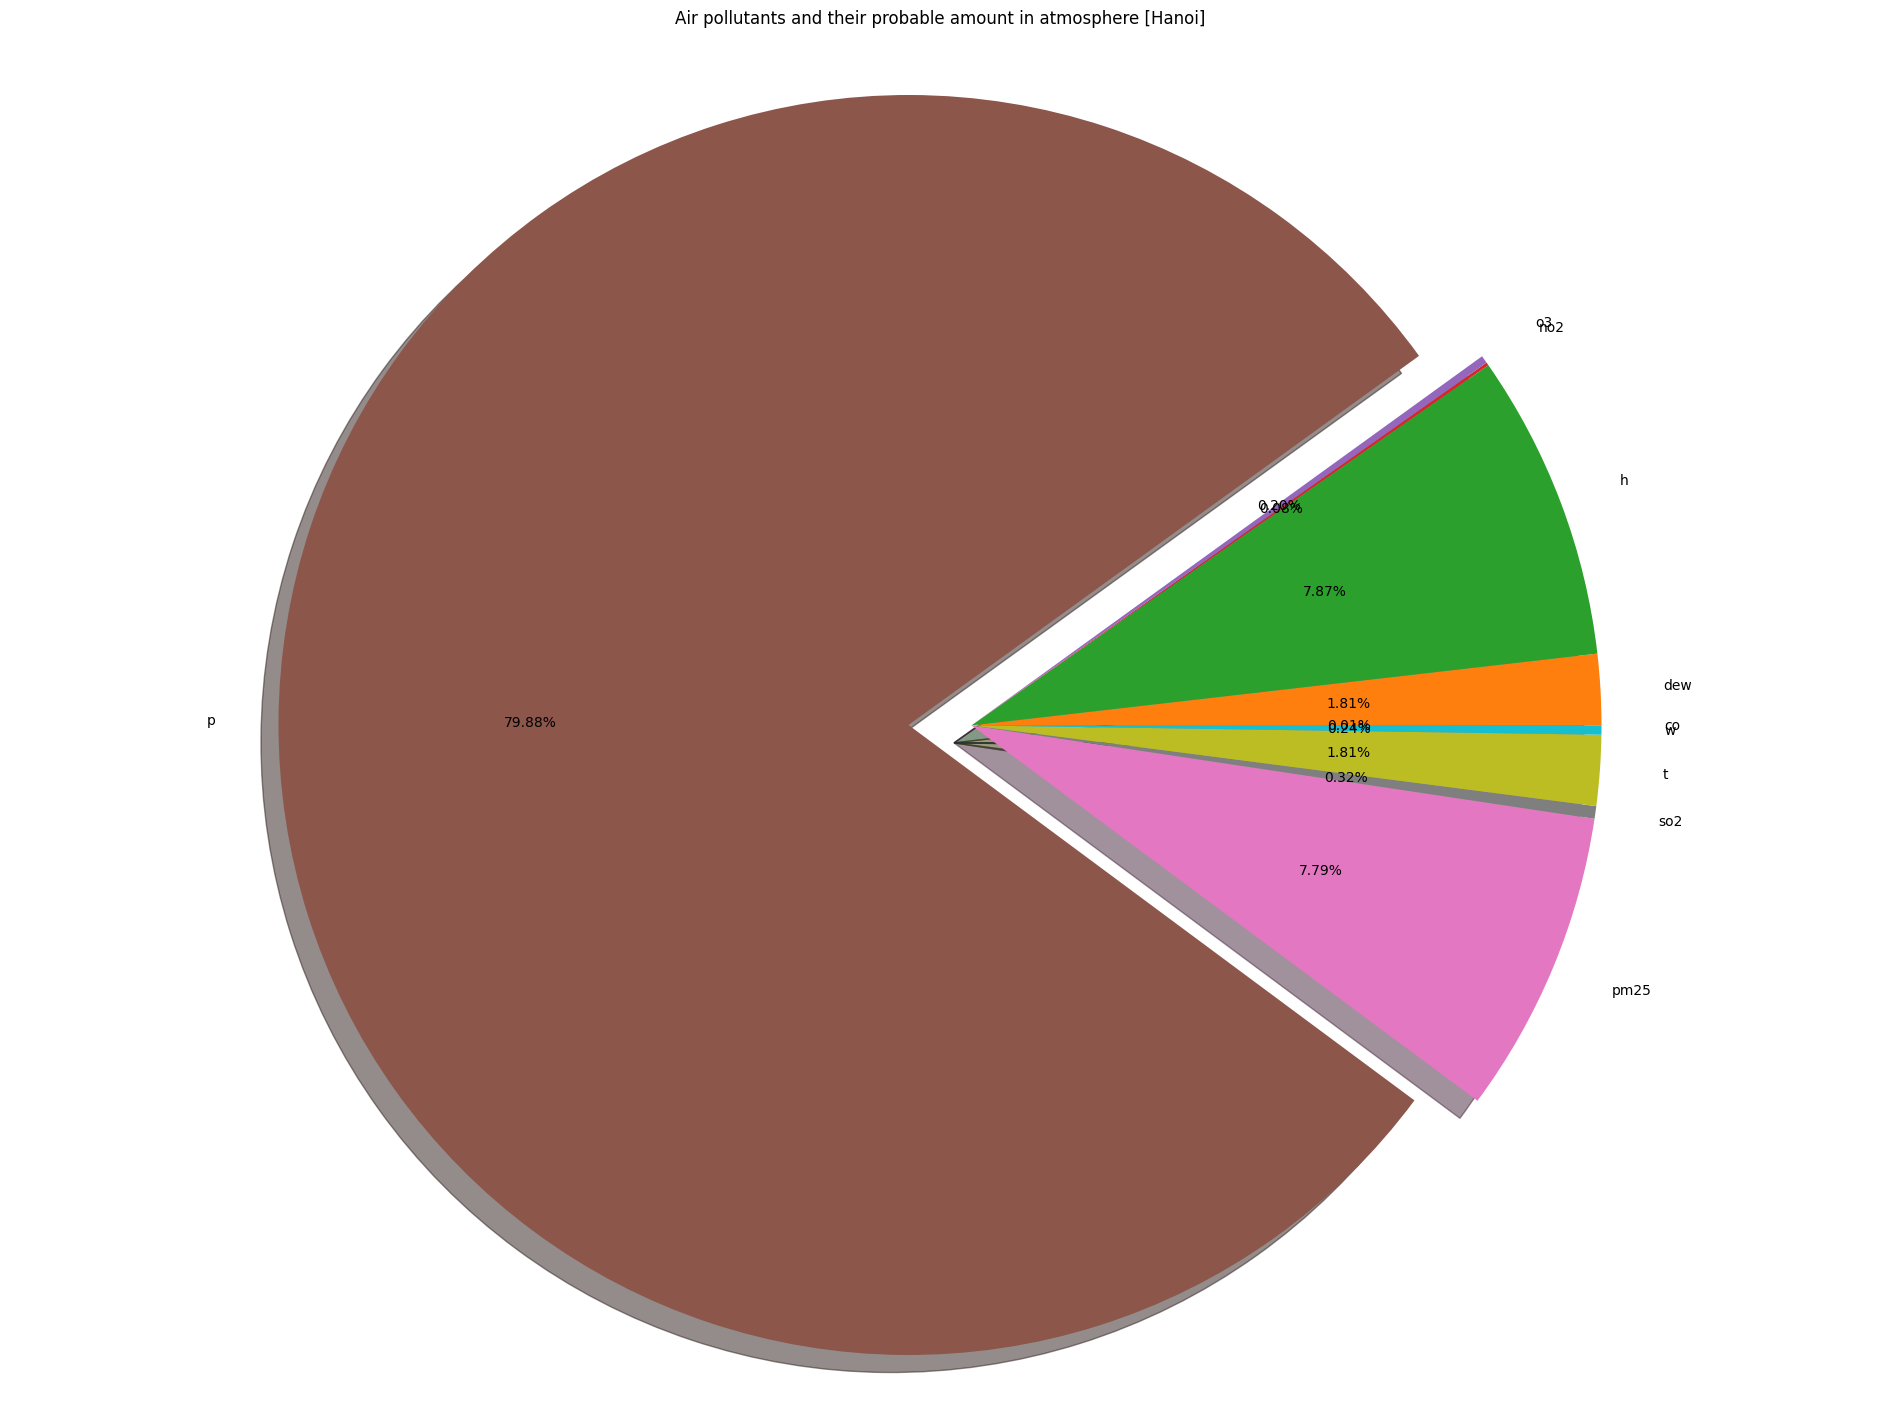

In [6]:
import matplotlib.pyplot as plt

pollutans = [i for i in iaqi]
values = [i['v'] for i in iaqi.values()]

print(pollutans)
print(values)

#plot a pie chart

explode = [0 for i in pollutans]
mx = values.index(max(values))
explode[mx] = 0.1

plt.figure(figsize=(24,18))

plt.pie(values, labels = pollutans, autopct='%1.2f%%', shadow = True, explode=explode)
# 1.2f de hien thi hai chu so sau dau phay, %% la hien thi ki tu '%

plt.title('Air pollutants and their probable amount in atmosphere [Hanoi]')
plt.axis('equal')

plt.show()

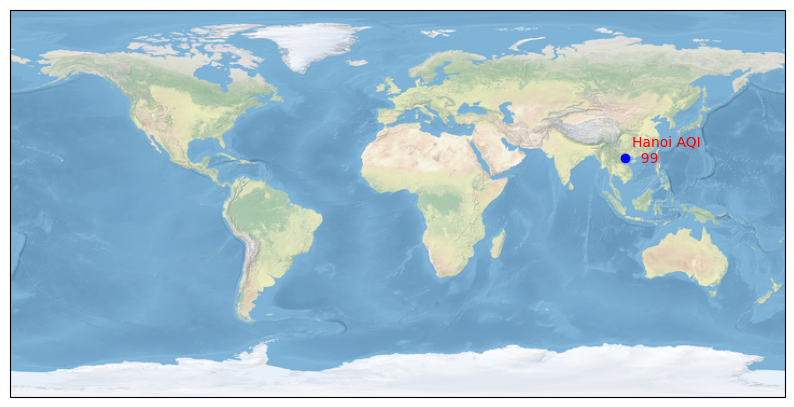

In [7]:
import cartopy.crs as ccrs

geo = data['city']['geo']

fig = plt.figure(figsize=(10,8))

ax = plt.axes(projection = ccrs.PlateCarree())
ax.stock_img()

plt.scatter(geo[1],geo[0],color = 'blue')
plt.text(geo[1] + 3, geo[0] - 2, f'{city} AQI \n  {aqi}', color = 'red' )

plt.show()